# Playing the Game of Life in Julia

We try to implement a Julia version of game of life. 
 
The following are the rules taken from Wikipedia:  

- Any live cell with two or three live neighbours survives.
- Any dead cell with three live neighbours becomes a live cell.
- All other live cells die in the next generation. Similarly, all other dead cells stay dead

We will keep it simple: only a `board` on which the game will be played and `start` will be implemented.  

We take `glider_gun` from *MATH50009's* lecture notes.

In [1]:
using Plots, Colors, LinearAlgebra

In [2]:
pattern₁ = [
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]]

pattern₂ = [
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]]


pattern₃ = [
    [0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0]
];


In [3]:
glider = reduce(hcat, pattern₁)'
blinker = reduce(hcat, pattern₂)'
glider_gun = reduce(hcat, pattern₃)'
glider_gun

36×9 adjoint(::Matrix{Int64}) with eltype Int64:
 0  0  0  0  1  1  0  0  0
 0  0  0  0  1  1  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 ⋮              ⋮        
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0
 0  0  1  1  0  0  0  0  0

(36, 9)


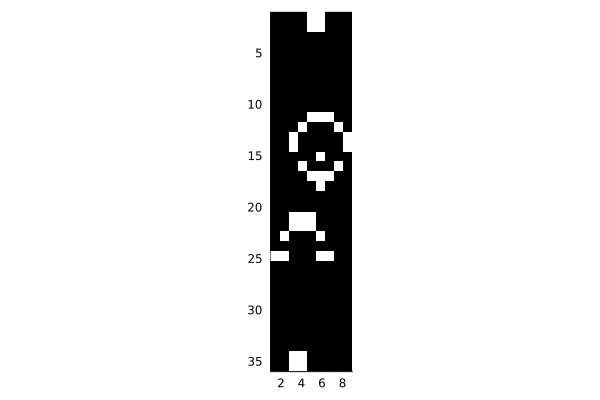

In [4]:
println(size(glider_gun))
plot(Gray.(glider_gun))

In [5]:
struct Board{T}
    V::Matrix{T}
    P::Adjoin
end

UndefVarError: UndefVarError: Adjoin not defined

## Roots of unity for fun

In [8]:
using Plots, LinearAlgebra, Printf

In [12]:
roots(n) = map(cispi, range(0, 2, length=n+1)[1:end-1])

roots (generic function with 1 method)

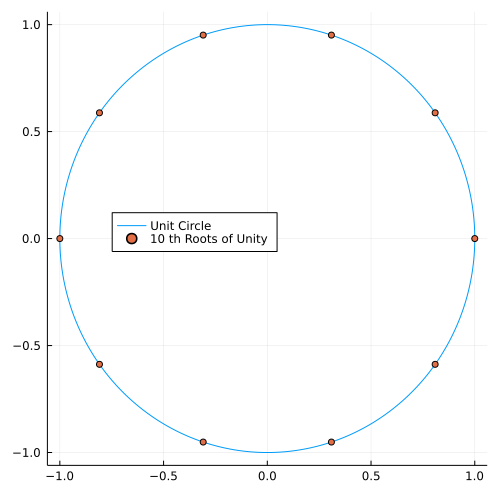

In [22]:
n = 10
solns = roots(n)
θ = range(0, 2*pi, length=1000)
plot(cos.(θ),sin.(θ), size = (500, 500), label = "Unit Circle", legend =:inside)
scatter!(real(solns), imag(solns), label = "$n th Roots of Unity")

## Visualizing Plots for Fun

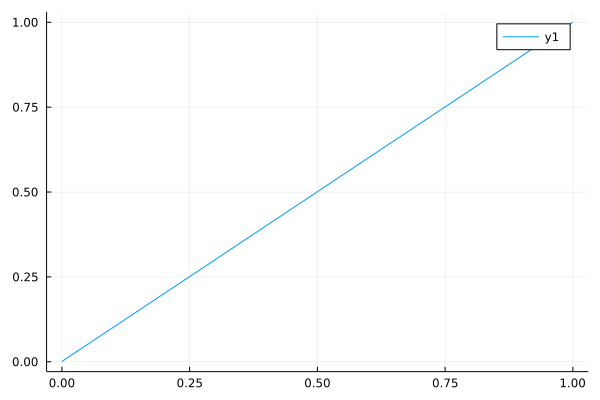

In [32]:
# Julia built-in
using DifferentialEquations
# 2*2 only
function eq(dX, X, A)
    dX[1] = A[1,1]*X[1] + A[1,2]*X[2]
    dX[2] = A[2,1]*X[1] + A[2,2]*X[2]
end
u₀ = [1, 0]
tspan = (-10.0, 10.0)
A = [1 -2;1 -1]
prob = ODEProblem(eq, u₀, tspan, A)
sol = solve(prob)

plot((sol[1],sol[2]))

In [55]:
#helper function to compute nxn samples taken from week5s
function samples0(n, N= 10, f=x->1.0*x)
    x = y = range(-N, N; length=n)
    return (x,y')
end

function samples(pairs,A)
    # produce flows
    result = [A*u0 for u0 in pairs]
end

A = [1 -2; 1 -1]
pairs = samples0(100)
ϕ0 = samples(pairs, A)
# plot((ϕ0[1],ϕ0[2]))

DimensionMismatch: DimensionMismatch("matrix A has dimensions (2,2), vector B has length 100")